<h1>Notebook - do seminário final Ciência de dados</h1>
<h2><b>Tema:</b> Análise de churn (cancelamento de clientes) - grupo 03</h2>

In [103]:
#import das bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report,roc_curve,auc,RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
#Carregando a base de dados
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
# Verificando a distribuição dos cancelamentos 
# yes -> cliente cancelou o serviço no ultimo mês
# no -> cliente não cancelou no ultimo mês

distribuicaoAlvo = df['Churn'].value_counts(normalize=True)
distribuicaoAlvo

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [106]:
#combinações de diferentes variáveis (serviço e cancelamento)
#PhoneService x Churn

dfPhone = df[['PhoneService','Churn']].value_counts(normalize=True)
tablePhone = dfPhone.reset_index()
tablePhone.columns = ['PhoneService','Cancelamento','proporção']
tablePhone = tablePhone.sort_values(by='proporção',ascending=False)
tablePhone

,PhoneService,Cancelamento,proporção
0,Yes,No,0.661934
1,Yes,Yes,0.241232
2,No,No,0.072696
3,No,Yes,0.024137


<Figure size 800x600 with 0 Axes>

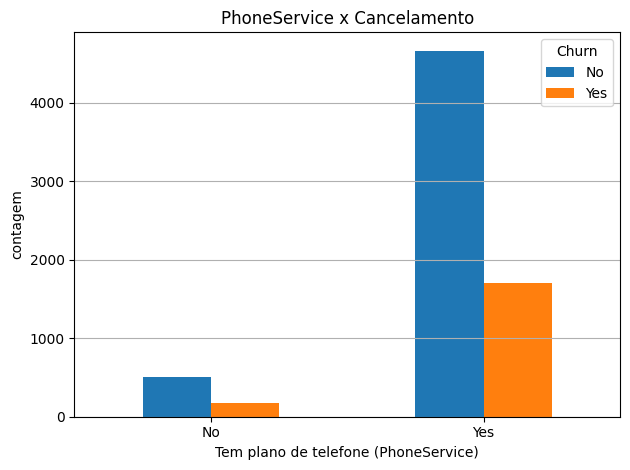

In [107]:
#Gráfico
table = pd.crosstab(df['Churn'],df['PhoneService'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("PhoneService x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Tem plano de telefone (PhoneService)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [108]:
#MultipleLines x Churn

dfMultiple = df[['MultipleLines','Churn']].value_counts(normalize=True)
tableMultiple = dfMultiple.reset_index()
tableMultiple.columns = ['MultipleLines','Cancelamento','proporção']
tableMultiple = tableMultiple.sort_values(by='proporção',ascending=False)
tableMultiple

,MultipleLines,Cancelamento,proporção
0,No,No,0.360784
1,Yes,No,0.301150
2,Yes,Yes,0.120687
3,No,Yes,0.120545
4,No phone service,No,0.072696
5,No phone service,Yes,0.024137


<Figure size 800x600 with 0 Axes>

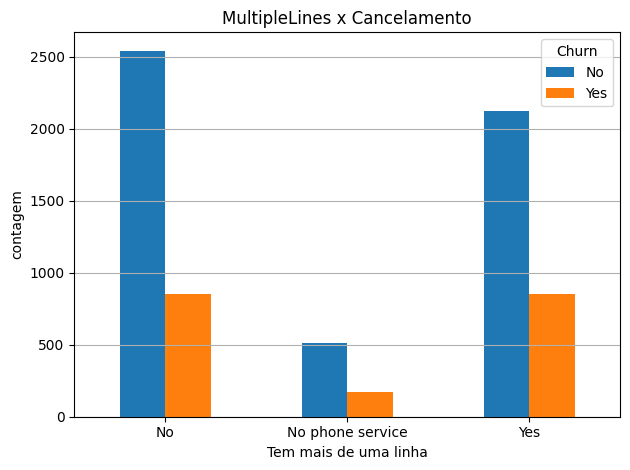

In [109]:
#Gráfico
table = pd.crosstab(df['Churn'],df['MultipleLines'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("MultipleLines x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Tem mais de uma linha")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [110]:
#InternetServices x Churn

dfIneternet = df[['InternetService','Churn']].value_counts(normalize=True)
tableInternet = dfIneternet.reset_index()
tableInternet.columns = ['InternetService','Cancelamento','proporção']
tableInternet = tableInternet.sort_values(by='proporção',ascending=False)
tableInternet

,InternetService,Cancelamento,proporção
0,DSL,No,0.278574
1,Fiber optic,No,0.255431
2,No,No,0.200625
3,Fiber optic,Yes,0.184154
4,DSL,Yes,0.065171
5,No,Yes,0.016044


<Figure size 800x600 with 0 Axes>

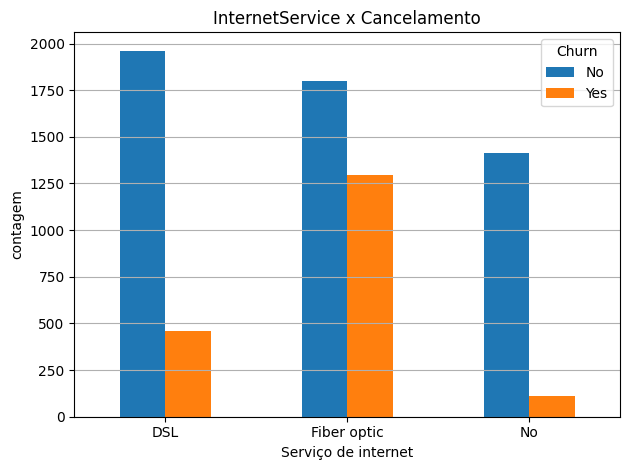

In [111]:
#Gráfico
table = pd.crosstab(df['Churn'],df['InternetService'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("InternetService x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Serviço de internet")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [112]:
#OnlineSecurity x Churn

dfOnlineSecurity = df[['OnlineSecurity','Churn']].value_counts(normalize=True)
tableOnlineSecurity = dfOnlineSecurity.reset_index()
tableOnlineSecurity.columns = ['OnlineSecurity','Cancelamento','proporção']
tableOnlineSecurity = tableOnlineSecurity.sort_values(by='proporção',ascending=False)
tableOnlineSecurity

,OnlineSecurity,Cancelamento,proporção
0,No,No,0.289223
1,Yes,No,0.244782
2,No,Yes,0.207440
3,No internet service,No,0.200625
4,Yes,Yes,0.041886
5,No internet service,Yes,0.016044


<Figure size 800x600 with 0 Axes>

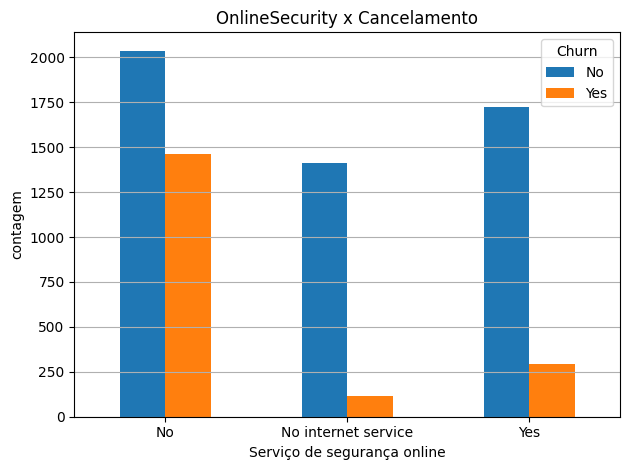

In [113]:
#Gráfico
table = pd.crosstab(df['Churn'],df['OnlineSecurity'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("OnlineSecurity x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Serviço de segurança online")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [114]:
#OnlineBackup x Churn

dfOnlineBackup = df[['OnlineBackup','Churn']].value_counts(normalize=True)
tableOnlineBackup = dfOnlineBackup.reset_index()
tableOnlineBackup.columns = ['OnlineBackup','Cancelamento','proporção']
tableOnlineBackup = tableOnlineBackup.sort_values(by='proporção',ascending=False)
tableOnlineBackup

,OnlineBackup,Cancelamento,proporção
0,Yes,No,0.270623
1,No,No,0.263382
2,No internet service,No,0.200625
3,No,Yes,0.175067
4,Yes,Yes,0.074258
5,No internet service,Yes,0.016044


<Figure size 800x600 with 0 Axes>

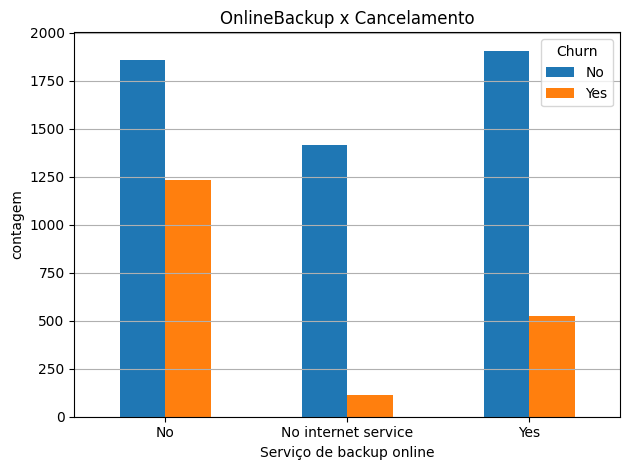

In [115]:
#Gráfico
table = pd.crosstab(df['Churn'],df['OnlineBackup'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("OnlineBackup x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Serviço de backup online")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [116]:
#DeviceProtection x Churn

dfDeviceProtection = df[['DeviceProtection','Churn']].value_counts(normalize=True)
tableDeviceProtection = dfDeviceProtection.reset_index()
tableDeviceProtection.columns = ['DeviceProtection','Cancelamento','proporção']
tableDeviceProtection = tableDeviceProtection.sort_values(by='proporção',ascending=False)
tableDeviceProtection

,DeviceProtection,Cancelamento,proporção
0,No,No,0.267500
1,Yes,No,0.266506
2,No internet service,No,0.200625
3,No,Yes,0.171944
4,Yes,Yes,0.077382
5,No internet service,Yes,0.016044


<Figure size 800x600 with 0 Axes>

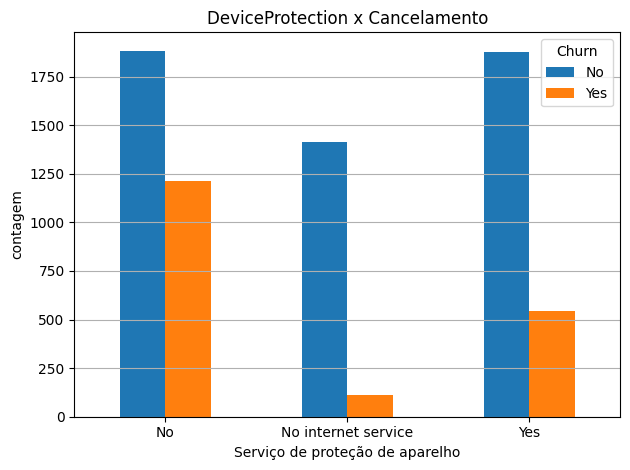

In [117]:
#Gráfico
table = pd.crosstab(df['Churn'],df['DeviceProtection'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("DeviceProtection x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Serviço de proteção de aparelho")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [118]:
#TechSupport x Churn

dfTechSupport = df[['TechSupport','Churn']].value_counts(normalize=True)
tableTechSupport = dfTechSupport.reset_index()
tableTechSupport.columns = ['TechSupport','Cancelamento','proporção']
tableTechSupport = tableTechSupport.sort_values(by='proporção',ascending=False)
tableTechSupport

,TechSupport,Cancelamento,proporção
0,No,No,0.287803
1,Yes,No,0.246202
2,No,Yes,0.205310
3,No internet service,No,0.200625
4,Yes,Yes,0.044015
5,No internet service,Yes,0.016044


<Figure size 800x600 with 0 Axes>

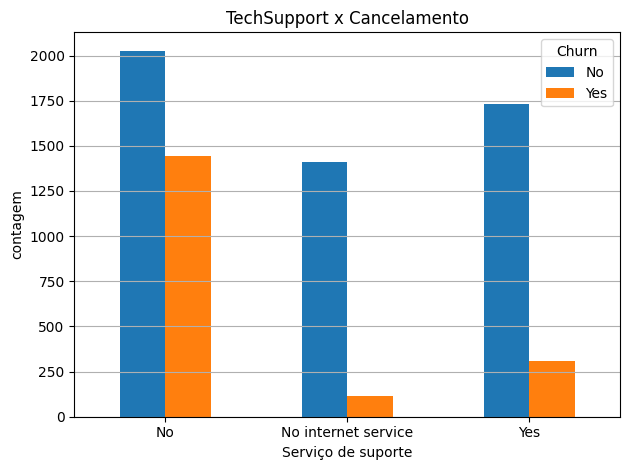

In [119]:
#Gráfico
table = pd.crosstab(df['Churn'],df['TechSupport'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("TechSupport x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Serviço de suporte")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [120]:
#StreamingTV x Churn

dfStreaming = df[['StreamingTV','Churn']].value_counts(normalize=True)
tableStreaming = dfStreaming.reset_index()
tableStreaming.columns = ['StreamingTV','Cancelamento','proporção']
tableStreaming = tableStreaming.sort_values(by='proporção',ascending=False)
tableStreaming

,StreamingTV,Cancelamento,proporção
0,Yes,No,0.268778
1,No,No,0.265228
2,No internet service,No,0.200625
3,No,Yes,0.133750
4,Yes,Yes,0.115576
5,No internet service,Yes,0.016044


<Figure size 800x600 with 0 Axes>

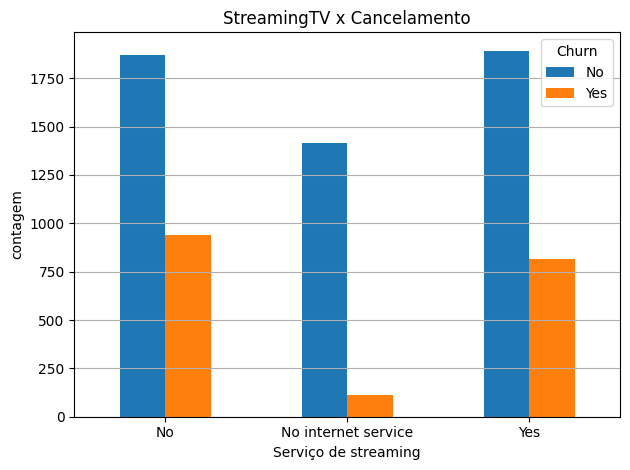

In [121]:
#Gráfico
table = pd.crosstab(df['Churn'],df['StreamingTV'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("StreamingTV x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Serviço de streaming")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [122]:
#StreamingMovies x Churn

dfStreamingMovies = df[['StreamingMovies','Churn']].value_counts(normalize=True)
tableStreamingMovies = dfStreamingMovies.reset_index()
tableStreamingMovies.columns = ['StreamingMovies','Cancelamento','proporção']
tableStreamingMovies = tableStreamingMovies.sort_values(by='proporção',ascending=False)
tableStreamingMovies

,StreamingMovies,Cancelamento,proporção
0,Yes,No,0.271759
1,No,No,0.262246
2,No internet service,No,0.200625
3,No,Yes,0.133182
4,Yes,Yes,0.116144
5,No internet service,Yes,0.016044


<Figure size 800x600 with 0 Axes>

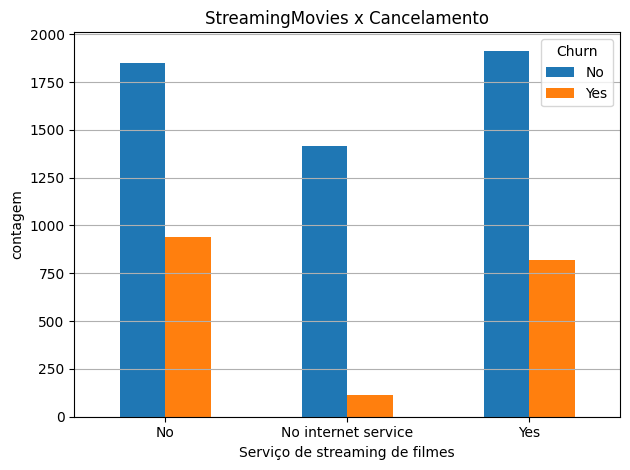

In [123]:
#Gráfico
table = pd.crosstab(df['Churn'],df['StreamingMovies'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("StreamingMovies x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Serviço de streaming de filmes")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [124]:
#Contract x Churn

dfContract = df[['Contract','Churn']].value_counts(normalize=True)
tableContract = dfContract.reset_index()
tableContract.columns = ['Contract','Cancelamento','proporção']
tableContract = tableContract.sort_values(by='proporção',ascending=False)
tableContract

,Contract,Cancelamento,proporção
0,Month-to-month,No,0.315207
1,Month-to-month,Yes,0.234985
2,Two year,No,0.233849
3,One year,No,0.185574
4,One year,Yes,0.023570
5,Two year,Yes,0.006815


<Figure size 800x600 with 0 Axes>

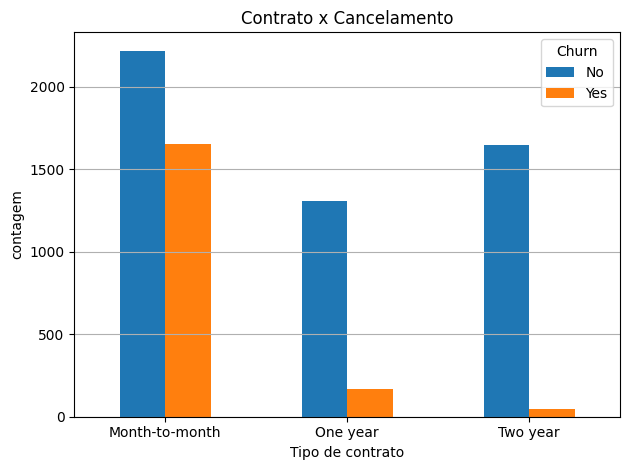

In [127]:
#Gráfico
table = pd.crosstab(df['Churn'],df['Contract'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("Contrato x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Tipo de contrato")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h2>Variável mais relacionada a cancelamentos:</h2>
<h3>InternetService: Maior número de cancelamentos e relação ao total, principalmente na categoria de fibra optica</h3>